## HTTP API Clients per test

Anche se gli strumenti per svilupparori che sono integrati nel browser consentono di ispezionare le richieste e le risposte HTTP ricevute, a volte può essere utile avere uno strumento ad hoc per testare le API che stiamo implementando.

Un "API client" è un software che consente di inviare delle richieste HTTP e ispezionare le risposte ricevute.

Consiglio una delle seguenti estensioni per VS Code.

- [Thunder Client](vscode:extension/rangav.vscode-thunder-client)
- [Ply](vscode:extension/ply-ct.vscode-ply)


## HTTP requests sequence diagram

- Server-Side Render (SSR)

- Client-Side Render (CSR)

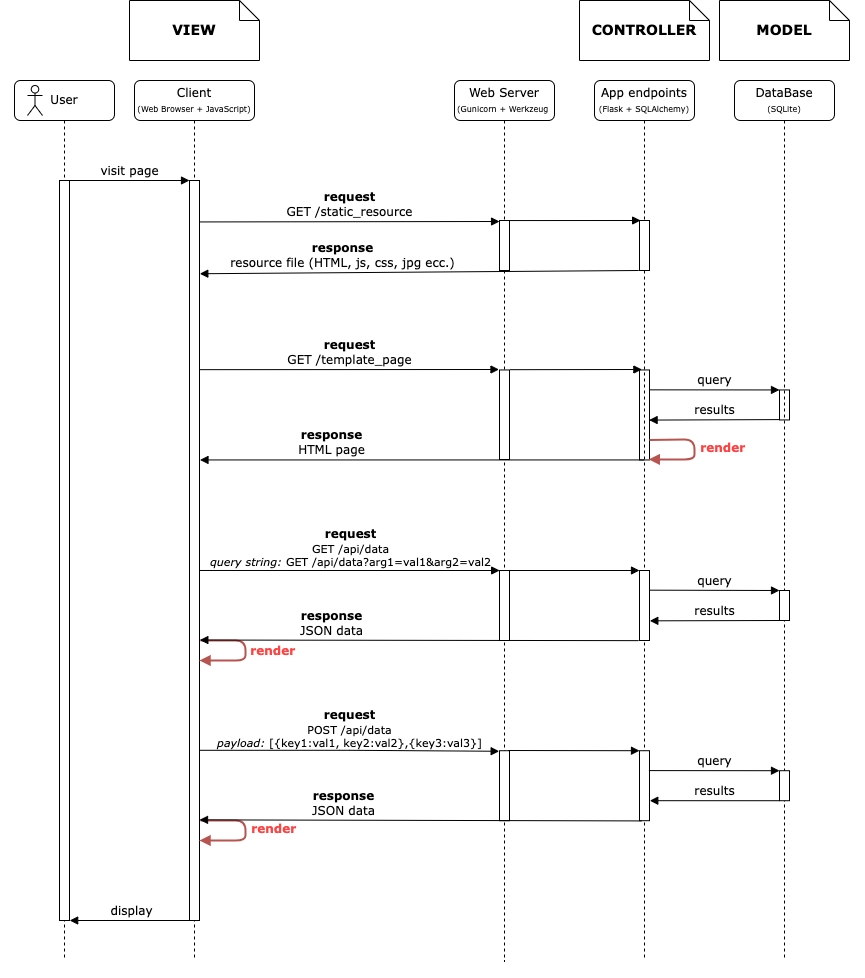

## Query string e payload

In ambito di sviluppo web e di comunicazione tra client e server, la *query string* e il corpo della richiesta (o *payload*) sono due metodi per inviare dati al server, ma differiscono in alcuni aspetti fondamentali.

### Query string

- **Definizione**: La *query string* è una parte dell'URL che viene utilizzata per inviare dati al server. Si trova alla fine dell'URL e inizia con un punto di domanda (?), seguito da coppie chiave-valore separate da un simbolo di e commerciale (&).
- **Uso tipico**: Viene spesso usata per richieste di tipo GET, dove i parametri della richiesta devono essere visibili nell'URL. È comune nelle ricerche e nei filtri applicati a pagine web, come nei motori di ricerca o nei cataloghi di e-commerce.
- **Visibilità**: I dati inviati tramite la query string sono visibili nell'URL, il che può rappresentare un problema di sicurezza se si inviano informazioni sensibili.

**Esempio**:
```url
http://example.com/search?query=python&category=programming
```

### Corpo della richiesta (payload)

- **Definizione**: Il corpo della richiesta, o *payload*, è una sezione del messaggio HTTP che contiene i dati effettivi da inviare al server. Questo viene utilizzato principalmente nelle richieste di tipo POST, PUT, PATCH e DELETE.
- **Uso tipico**: Viene usato quando è necessario inviare una quantità significativa di dati o dati strutturati, come informazioni di un modulo, dati JSON, file, ecc.
- **Visibilità**: I dati nel corpo della richiesta non sono visibili nell'URL e possono essere protetti meglio, il che è utile per l'invio di informazioni sensibili.

**Esempio**:
```http
POST /submit-form HTTP/1.1
Host: example.com
Content-Type: application/json
Content-Length: 44

{
  "username": "pippo",
  "password": "segreto123"
}
```

### In sintesi

Abbiamo due modalità per inviare dati al server e le usiamo in base alle esigenze specifiche della comunicazione:

- **Query string**: Usata principalmente con richieste GET (ma non solo), visibile nell'URL, adatta per dati brevi e non sensibili.

- **Payload**: Usato con richieste POST, PUT, DELETE, ecc., non visibile nell'URL, adatto per dati complessi e sensibili.

### Query string + Payload assieme

È importante notare che è possibile usare una query string e il corpo della richiesta contemporaneamente in una richiesta HTTP.

Questo può essere utile in una varietà di scenari in cui hai bisogno di passare parametri di controllo o che riguardano l'interfaccia utente, assieme ai dati effettivi della richiesta.

Per esempio, se avessimo un endpoint che riceve la *richiesta* per la creazione di un record e poi restituisce l'elenco dei record aggiornato come *risposta*, potremmo scrivere una richiesta come questa, che indica nella query string l'ordinamento dei record che dovranno essere restituiti e nel payload i dati per la creazione del nuovo record:

```http
POST /api/resource?order=asc&theme=dark HTTP/1.1
Host: example.com
Content-Type: application/json
Content-Length: 62

{
  "nome": "Pippo Pluto",
  "messaggio": "Ciao a tutti. Bel sito!"
}
```

Lato server, usando Flask, possiamo accedere sia alla query string sia al corpo della richiesta, che in questo caso è in formato JSON:

```python
@app.route('/api/resource', methods=['POST'])
def add_message():
    nome = request.json.get('nome')
    messaggio = request.json.get('messaggio')
    ordinamento = request.args.get('order', 'asc')

    # Creazione del nuovo messaggio dul DB con l'ORM di SQLAlchemy
    new_message = Message(nome=nome, messaggio=messaggio)
    db.session.add(new_message)
    db.session.commit()

    # Recupero e ordinamento dei messaggi dal DB
    if ordinamento == 'desc':
        messages = Message.query.order_by(Message.data_ora.desc()).all()
    else:
        messages = Message.query.order_by(Message.data_ora.asc()).all()

    # Conversione dei messaggi in formato JSON
    messages_list = [{"id": msg.id, "nome": msg.nome, "messaggio": msg.messaggio} for msg in messages]

    return jsonify(messages_list)
```

**NOTA BENE**: Questo esempio è un caso un po' estremo e non è "RESTful". In teoria sarebbe preferibile usare due endpoint separati: uno per la scrittura e uno per la lettura, come consiglia il paradigma REST.

## Paradigma architetturale REST

"[REST](https://it.wikipedia.org/wiki/Representational_state_transfer)" è un acronimo che sta per "REpresentational State Transfer". Questo termine è stato coniato da Roy Fielding nella sua tesi di dottorato nel 2000 e descrive uno stile architetturale per progettare sistemi di rete.

"RESTful" è un aggettivo che descrive i servizi web o le API che aderiscono ai principi di REST.

### Dettaglio dell'acronimo "REST":

1. **Representational (rappresentazionale)**:
   - Indica che le risorse (che possono essere qualsiasi entità come dati o servizi) vengono rappresentate in vari formati (come JSON, XML, HTML, ecc.). Queste rappresentazioni possono essere trasferite tra client e server.

2. **State (stato)**:
   - Si riferisce allo stato dell'applicazione o del sistema. In un sistema RESTful, lo stato di una risorsa può essere trasferito dal server al client tramite una rappresentazione.

3. **Transfer (trasferimento)**:
   - Si riferisce al trasferimento di dati tra client e server. Per esempio il protocollo HTTP, comunemente utilizzato per questo scopo, permette al client di interagire con le risorse sul server tramite richieste HTTP standard.



### Applicazione RESTful

Sviluppare un'applicazione RESTful significa creare un'applicazione che utilizza il paradigma REST (Representational State Transfer) per la comunicazione tra client e server.

### Principi di REST:

**Risorse**: Le risorse sono qualsiasi cosa che può essere nominata e rappresentata, come utenti, documenti, immagini, ecc. Ogni risorsa è identificata da un URL (Uniform Resource Locator).

**Verbi HTTP**: Perché un'applicazione sia considerata pienamente RESTful, dovrebbe idealmente utilizzare tutti i metodi HTTP in modo appropriato per le operazioni **CRUD** (Create, Read, Update, Delete) sulle risorse:
- **GET**: Recupera una risorsa.
- **POST**: Crea una nuova risorsa.
- **PUT**: Aggiorna una risorsa esistente.
- **DELETE**: Elimina una risorsa.

**NOTA BENE**: Nella pratica, non è obbligatorio usare tutti i verbi HTTP per creare un'applicazione RESTful, anche se questo può limitare l'aderenza ai principi REST e influire sulla chiarezza e l'efficienza dell'API.

### Esempio di un'API RESTful da manuale

Supponiamo di avere un'applicazione per la gestione degli utenti. Seguendo il paradigma REST, potremmo definire degli endpoint che gestiscano le seguenti richieste:

- `GET /users`: Recupera una lista di tutti gli utenti.
- `GET /users/<id>`: Recupera i dettagli di un utente specifico.
- `POST /users`: Crea un nuovo utente.
- `PUT /users/<id>`: Aggiorna i dettagli di un utente esistente.
- `DELETE /users/<id>`: Elimina un utente specifico.